# Exact solution used in MES runs


We would like to MES the operation

$$
\partial_\rho\partial_\rho f
$$

Using cylindrical geometry.

This could of course be done with 

$$
\partial_\rho^2 f
$$

but terms like this appears in $\nabla(f\nabla_\perp g)$ and $\{\partial_\rho f, g\}$

In [1]:
%matplotlib notebook

from IPython.display import display

from sympy import init_printing
from sympy import Eq, S, symbols
from sympy import sin, cos, tanh, exp, pi, sqrt

from boutdata.mms import x, y, z, t
from boutdata.mms import DDX

import os, sys
# If we add to sys.path, then it must be an absolute path
common_dir = os.path.abspath('./../../../../common')
# Sys path is a list of system paths
sys.path.append(common_dir)
from CELMAPy.MES import get_metric, make_plot, BOUT_print

init_printing()

## Initialize

In [2]:
folder = '../mixMode/'
metric = get_metric()

## Define the variables

In [3]:
# Initialization
the_vars = {}

### Define the function to take the derivative of

**NOTE**:

1. z must be periodic
2. The field $f(\rho, \theta)$ must be of class infinity in $z=0$ and $z=2\pi$
3. The field $f(\rho, \theta)$ must be single valued when $\rho\to0$
4. The field $f(\rho, \theta)$ must be continuous in the $\rho$ direction with $f(\rho, \theta + \pi)$
5. Eventual BC in $\rho$ must be satisfied

In [4]:
# We need Lx
from boututils.options import BOUTOptions
myOpts = BOUTOptions(folder)
Lx = eval(myOpts.geom['Lx'])

In [5]:
# Mixmode

# Need the x^3 in order to let the second derivative of the field go towards one value when rho -> 0 (needed in Arakawa brackets)
# Mutliply with a mix of modes
# Multiply with a tanh in order to make the variation in x more homogeneous
the_vars['f'] = 6+((x/(Lx))**3)*\
                cos(2*z)*\
                (
                   cos(2*pi*(x/Lx)) + sin(2*pi*(x/Lx))
                 + cos(3*2*pi*(x/Lx)) + cos(2*2*pi*(x/Lx))                
                )\
                *(1/2)*(1-tanh((1/8)*(x-10)))

Check that the function and its derivative is single valued

In [6]:
display(Eq(symbols('f(x=0, z)'), the_vars['f'].subs([(x,0)])))
display(Eq(symbols('f(x=0, z)_x'), the_vars['f'].diff(x).subs([(x,0)])))
display(Eq(symbols('f(x=0, z)_xx'), the_vars['f'].diff(x,2).subs([(x,0)])))

Calculating the solution

In [7]:
the_vars['S'] = DDX(DDX(the_vars['f'], metric=metric), metric=metric)

## Plot

<IPython.core.display.Javascript object>


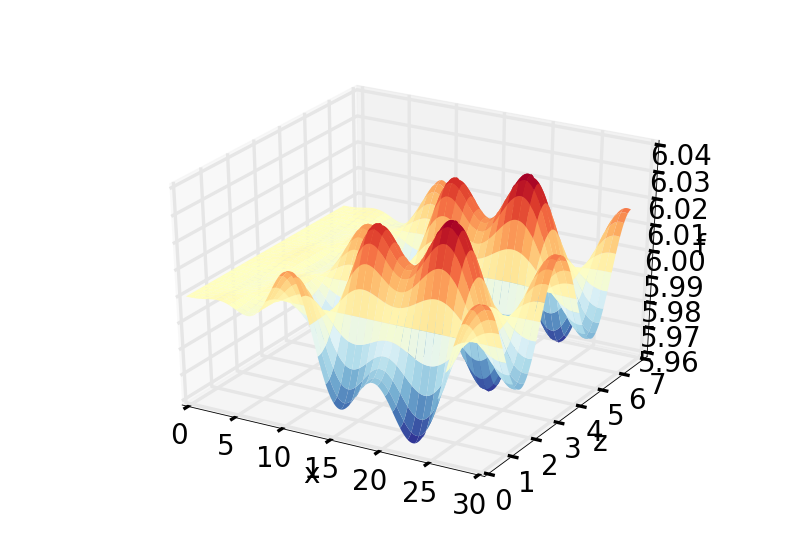

<IPython.core.display.Javascript object>


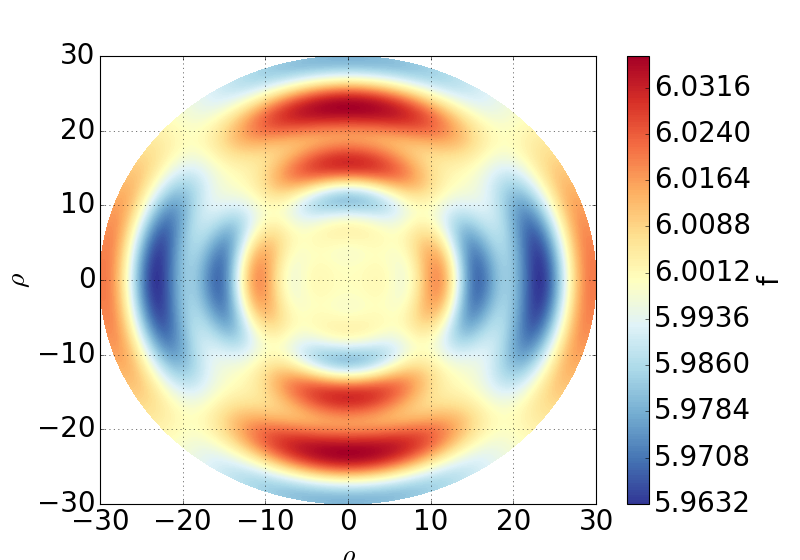

<IPython.core.display.Javascript object>


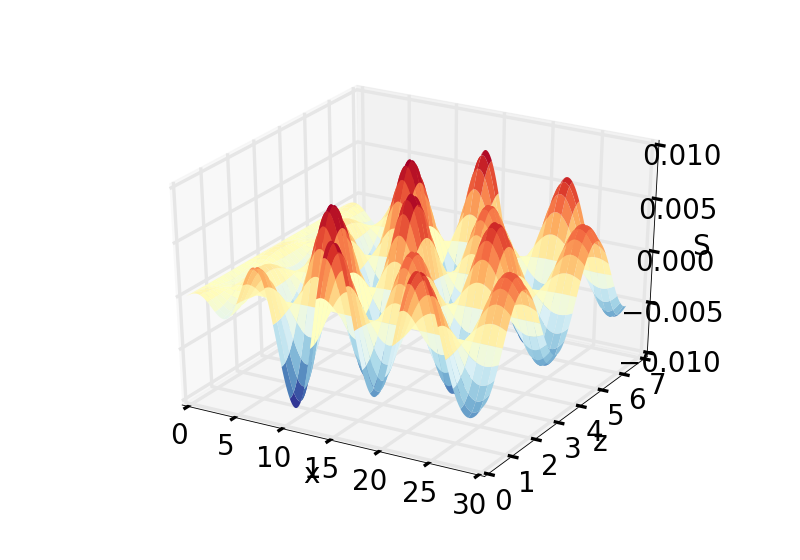

<IPython.core.display.Javascript object>


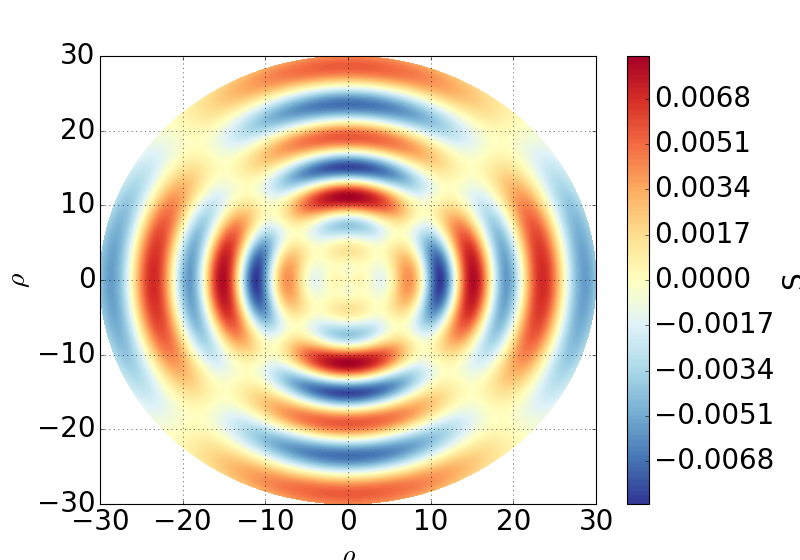

In [8]:
make_plot(folder=folder, the_vars=the_vars, plot2d=True, include_aux=False)

## Print the variables in BOUT++ format

In [9]:
BOUT_print(the_vars, rational=False)


[f]
1.85185185185185e-5*geom:xl^3*(-tanh(0.125*geom:xl - 1.25) + 1)*(sin(pi*geom:xl/15) + cos(pi*geom:xl/15) + cos(2*pi*geom:xl/15) + cos(pi*geom:xl/5))*cos(2*z) + 6

[S]
1.85185185185185e-5*geom:xl^3*(-tanh(0.125*geom:xl - 1.25) + 1)*(-pi^2*sin(pi*geom:xl/15)/225 - pi^2*cos(pi*geom:xl/15)/225 - 4*pi^2*cos(2*pi*geom:xl/15)/225 - pi^2*cos(pi*geom:xl/5)/25)*cos(2*z) + 2.31481481481481e-6*geom:xl^3*(-0.25*tanh(0.125*geom:xl - 1.25)^2 + 0.25)*(sin(pi*geom:xl/15) + cos(pi*geom:xl/15) + cos(2*pi*geom:xl/15) + cos(pi*geom:xl/5))*cos(2*z)*tanh(0.125*geom:xl - 1.25) + 3.7037037037037e-5*geom:xl^3*(0.125*tanh(0.125*geom:xl - 1.25)^2 - 0.125)*(-pi*sin(pi*geom:xl/15)/15 - 2*pi*sin(2*pi*geom:xl/15)/15 - pi*sin(pi*geom:xl/5)/5 + pi*cos(pi*geom:xl/15)/15)*cos(2*z) + 0.000111111111111111*geom:xl^2*(-tanh(0.125*geom:xl - 1.25) + 1)*(-pi*sin(pi*geom:xl/15)/15 - 2*pi*sin(2*pi*geom:xl/15)/15 - pi*sin(pi*geom:xl/5)/5 + pi*cos(pi*geom:xl/15)/15)*cos(2*z) + 0.000111111111111111*geom:xl^2*(0.125*tanh(0.125*g